In [14]:
# 教師なし学習
# 教師情報を用いない学習方法全般を指している
# 主にデータの特徴を探索する場合に用いられる

In [15]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

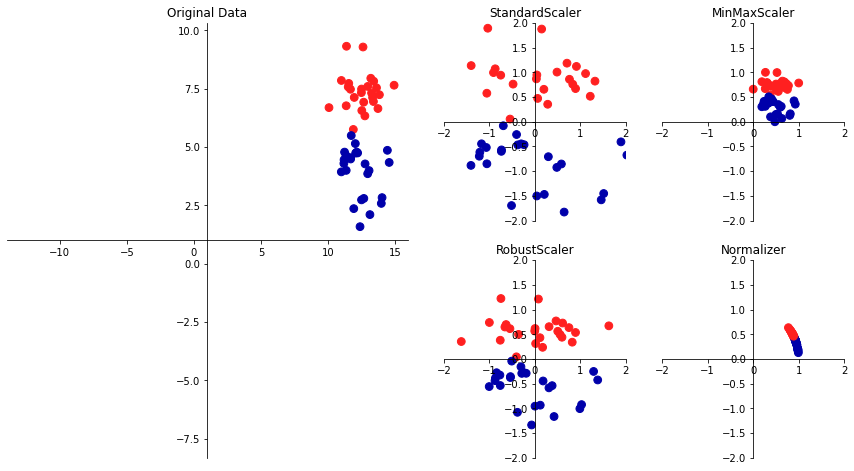

In [16]:
# それぞれのパターンでスケールした場合のデータ分布
mglearn.plots.plot_scaling()

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# cancerデータを例にデータ変換を取り扱う
# ここではcancerデータを訓練/テストに分割する
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [18]:
from sklearn.preprocessing import MinMaxScaler

# データが0~1の間になるMinMaxScaler変換を行う
scaler = MinMaxScaler()

# scalerのfitメソッドでデータ変換のために学習を行う
# スケール変換器ではX_trainのみを適合する
scaler.fit(X_train)

MinMaxScaler()

In [19]:
# データ変換を適用するためにtranformメソッドを利用する
X_train_scaled = scaler.transform(X_train)
# スケール後のデータを可視化する
# 最大・最小が1~0の範囲になっていることが確認できる
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [20]:
# テストデータにも同様の変換を行う
X_test_scaled = scaler.transform(X_test)
# テストデータのスケール変換は0~1になっていない
# なぜならば訓練データを用いて学習した物なので、テストデータと最大最小が異なっているからである
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
per-feature maximum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

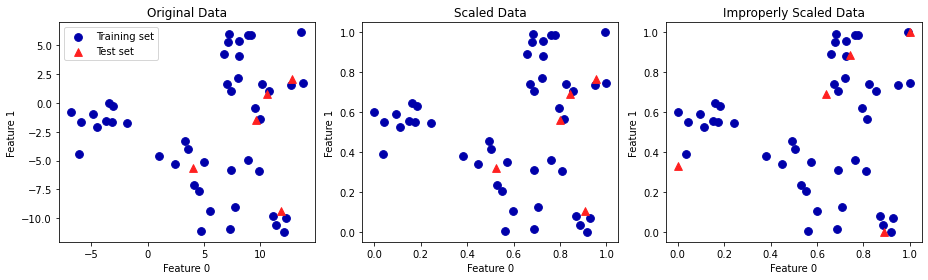

In [21]:
# しかし、教師ありモデルをテストセットに対して適用する場合に、テストセットと訓練セットは同様の変換を行うことが重要になる
from sklearn.datasets import make_blobs
# データの合成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練データとテストデータに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練データとテストデータをプロットする
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練データとは別のスケール変換
# 最大・最小が1~0になる
# 実際はやってはいけないことなので注意！
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 可視化
# テストデータのデータポイントが変わっていることが問題である
# 従来のスケール変換では値が変化しても訓練データとテストデータのデータポイントは変わっていない
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [22]:
# 教師あり学習における前処理の効果

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

# サポートベクタマシンで例をみる
# スケール変換を実施しない場合
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [23]:
# MinMaxScalerを実施する
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# svmで適合させる
svm.fit(X_train_scaled, y_train)

# スケール変換すると精度が変化する
# 機械学習アルゴリズムは同じスケールを前提としているケースが多いから
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [24]:
# 平均 0, 分散 1に前処理
from sklearn.preprocessing import StandardScaler
# スケールクラスを変更するだけでスケール変換アルゴリズムを変更できる
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


In [25]:
# 次元削除、特徴量抽出、多様体学習
# 教師なし学習のモチベーションとして、可視化、データ圧縮、処理に適した表現の探索等がある
# これらの目的によく用いられるアルゴリズムが、「主成分分析(PCA)」である。
# これ以外にも、特徴量抽出に用いられる非負値行列因子分解(NMF)と可視化に用いられるt-SNEを見ていく

In [26]:
# 主成分分析
# 特徴量を相互に統計的に関連しないように回転する手法である
# ほとんどの場合、回転した後に特徴量からデータを説明するのに重要な一部の特徴量を抜き出す

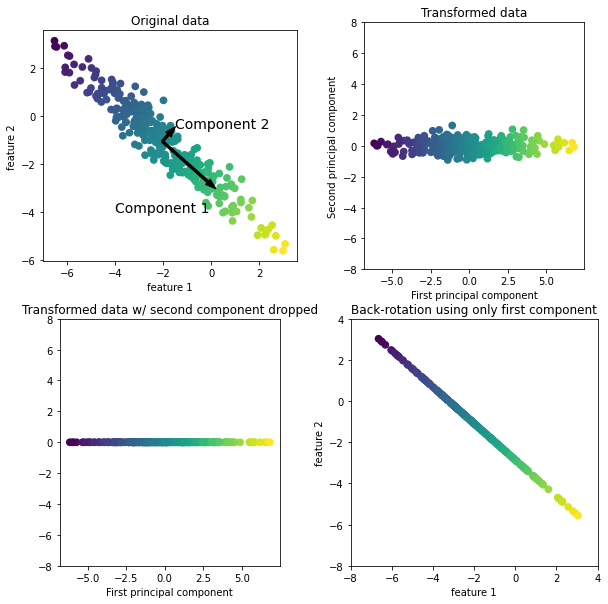

In [28]:
mglearn.plots.plot_pca_illustration()

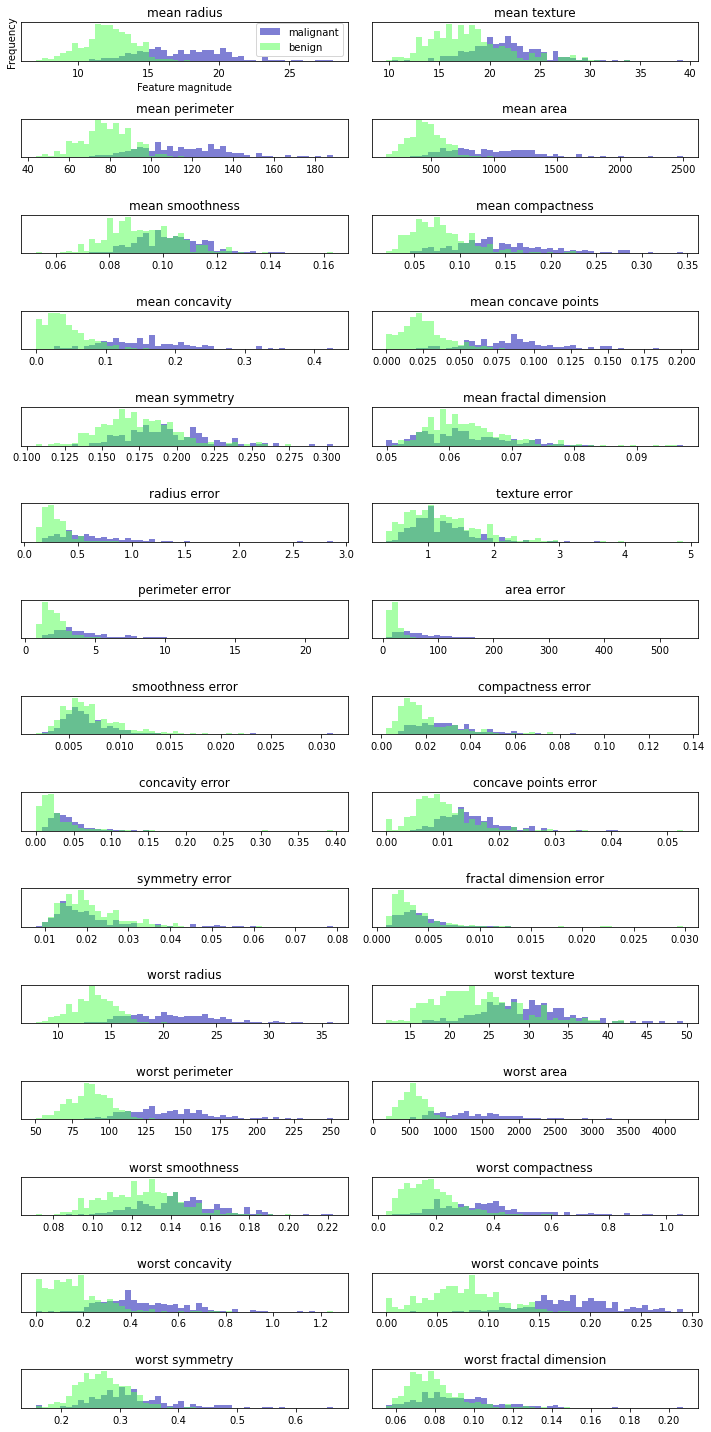

In [31]:
# cancerデータの特徴を可視化する
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    # 良性・悪性の結果が各特徴量のレンジにどれだけ入ったかをヒストグラムで可視化する
    # 例としてsmoothness errorはほとんど重なっているため、特徴量として得られる情報が少ないと予想できる
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [33]:
from sklearn.datasets import load_breast_cancer
# cancerデータを主成分分析する
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [34]:
from sklearn.decomposition import PCA
# データの最初の2つの主成分だけを維持する
pca = PCA(n_components=2)
# PCAモデルを適合する
pca.fit(X_scaled)

# 最初の2つの主成分に対してデータポイントを変換する
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

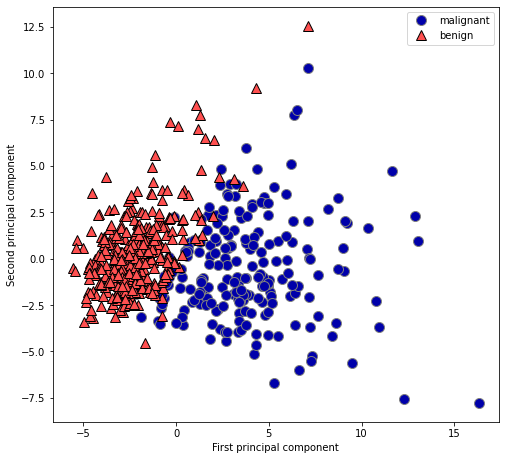

In [35]:
# 第1主成分と第2主成分によるプロット
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [36]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, 'Principal components')

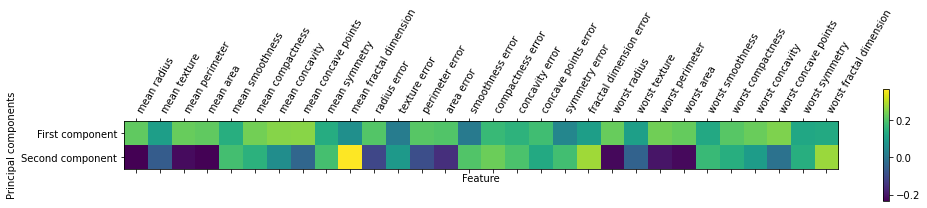

In [37]:
# 行列として配列を表示する
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")